Clone example from skimage-tutorials

In [ ]:
!git clone --depth=1 https://github.com/scikit-image/skimage-tutorials

Cloning into 'skimage-tutorials'...
remote: Enumerating objects: 272, done.
remote: Counting objects: 100% (272/272), done.
remote: Compressing objects: 100% (248/248), done.
remote: Total 272 (delta 32), reused 208 (delta 10), pack-reused 0
Receiving objects: 100% (272/272), 65.18 MiB | 25.72 MiB/s, done.
Resolving deltas: 100% (32/32), done.


# Images are numpy arrays

Images are represented in ``scikit-image`` using standard ``numpy`` arrays.  This allows maximum inter-operability with other libraries in the scientific Python ecosystem, such as ``matplotlib`` and ``scipy``.

Let's see how to build a grayscale image as a 2D array:

[[0.1346992  0.98508827 0.50009072 0.63163765 0.1924299  0.24151956
  0.06334217 0.74834686 0.54944374 0.7363062 ]
 [0.04042426 0.96087196 0.74184023 0.83983698 0.4200975  0.57159936
  0.15368721 0.14704473 0.93091186 0.00502579]
 [0.0781668  0.77635002 0.12042899 0.76925494 0.45682621 0.31969894
  0.77846486 0.66993618 0.40148597 0.21375297]
 [0.73167707 0.49137848 0.78910706 0.79832779 0.12334921 0.58184779
  0.70057853 0.70430024 0.70258372 0.77077611]
 [0.20760081 0.45109118 0.6159996  0.51532702 0.34944012 0.83166397
  0.02140139 0.30141693 0.53213315 0.36576479]
 [0.7424716  0.12318775 0.26772697 0.49024739 0.57966154 0.62038319
  0.675507   0.41656871 0.96214895 0.92682223]
 [0.39205682 0.35862685 0.17905273 0.33714436 0.6912228  0.05000898
  0.80366998 0.38014257 0.97492205 0.36691904]
 [0.94186048 0.34552406 0.02860958 0.10313497 0.13741184 0.45250757
  0.11563192 0.56960898 0.13048735 0.19086713]
 [0.37806893 0.05755912 0.99335904 0.12559078 0.6508579  0.63241566
  0.35998054

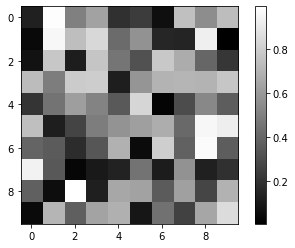

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

random_image = np.random.random([10, 10])
print(random_image)

plt.imshow(random_image, cmap='gray')
plt.colorbar();

The same holds for "real-world" images:

Type: <class 'numpy.ndarray'>
dtype: uint8
shape: (303, 384)


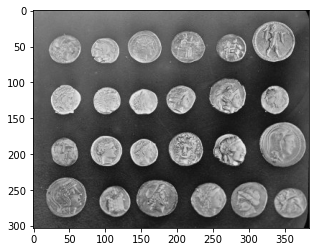

In [ ]:
from skimage import data

coins = data.coins()

print('Type:', type(coins))
print('dtype:', coins.dtype)
print('shape:', coins.shape)

plt.imshow(coins, cmap='gray');

A color image is a 3D array, where the last dimension has size 3 and represents the red, green, and blue channels:

Shape: (300, 451, 3)
Values min/max: 0 231


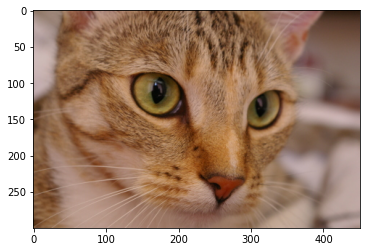

In [ ]:
cat = data.chelsea()
print("Shape:", cat.shape)
print("Values min/max:", cat.min(), cat.max())

#print(cat)

plt.imshow(cat);

These are *just NumPy arrays*. E.g., we can make a red square by using standard array slicing and manipulation:

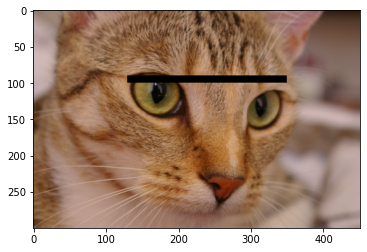

In [ ]:
cat[90:100, 130:350,:] = [0, 0, 0]  # [red, green, blue]
cat[150:100, 130:150,:] = [0, 0, 0]  # [red, green, blue]
cat[200:100, 280:150,:] = [0, 0, 0]  # [red, green, blue]
plt.imshow(cat);

Images can also include transparent regions by adding a 4th dimension, called an *alpha layer*.

### Other shapes, and their meanings

|Image type|Coordinates|
|:---|:---|
|2D grayscale|(row, column)|
|2D multichannel|(row, column, channel)|
|3D grayscale (or volumetric) |(plane, row, column)|
|3D multichannel|(plane, row, column, channel)|

## Displaying images using matplotlib

In [ ]:
from skimage import data

img0 = data.chelsea()
img1 = data.rocket()

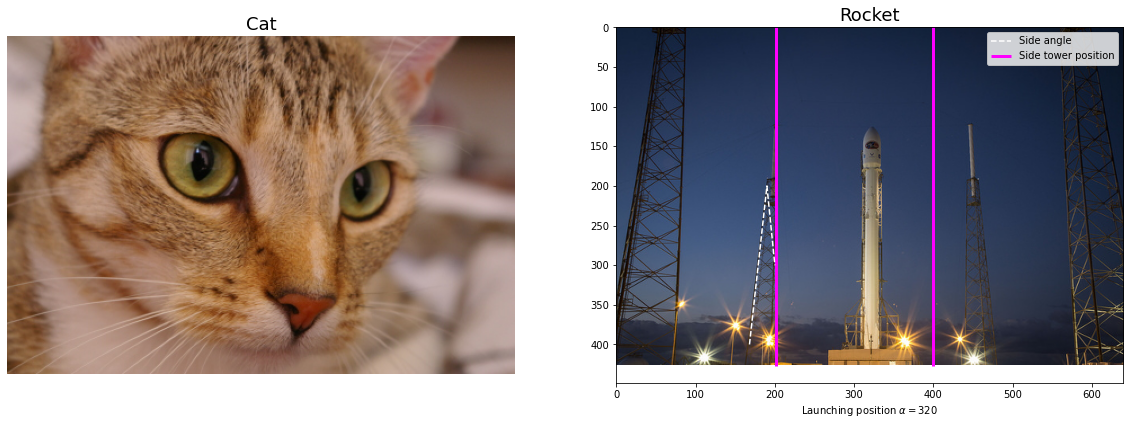

In [ ]:
import matplotlib.pyplot as plt

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 10))

ax0.imshow(img0)
ax0.set_title('Cat', fontsize=18)
ax0.axis('off')

ax1.imshow(img1)
ax1.set_title('Rocket', fontsize=18)
ax1.set_xlabel(r'Launching position $\alpha=320$')

ax1.vlines([202, 400], 0, img1.shape[0], colors='magenta', linewidth=3, label='Side tower position')
ax1.plot([168, 190, 200], [400, 200, 300], color='white', linestyle='--', label='Side angle')

ax1.legend();

For more on plotting, see the [Matplotlib documentation](https://matplotlib.org/gallery/index.html#images-contours-and-fields) and [pyplot API](https://matplotlib.org/api/pyplot_summary.html).

## Data types and image values

In literature, one finds different conventions for representing image values:

```
  0 - 255   where  0 is black, 255 is white
  0 - 1     where  0 is black, 1 is white
```

``scikit-image`` supports both conventions--the choice is determined by the
data-type of the array.

E.g., here, I generate two valid images:

Linear0: float64 0.0 1.0
Linear1: uint8 0 255


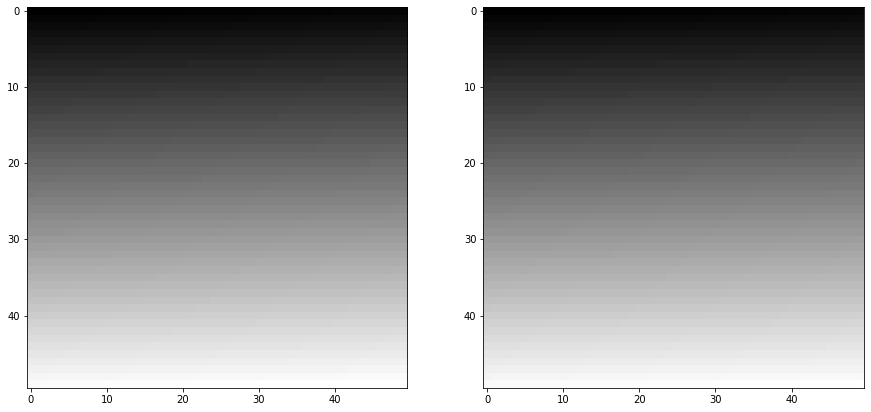

In [ ]:
linear0 = np.linspace(0, 1, 2500).reshape((50, 50))
linear1 = np.linspace(0, 255, 2500).reshape((50, 50)).astype(np.uint8)

print("Linear0:", linear0.dtype, linear0.min(), linear0.max())
print("Linear1:", linear1.dtype, linear1.min(), linear1.max())

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 15))
ax0.imshow(linear0, cmap='gray')
ax1.imshow(linear1, cmap='gray');

The library is designed in such a way that any data-type is allowed as input,
as long as the range is correct (0-1 for floating point images, 0-255 for unsigned bytes,
0-65535 for unsigned 16-bit integers).

You can convert images between different representations by using ``img_as_float``, ``img_as_ubyte``, etc.:

In [ ]:
from skimage import img_as_float, img_as_ubyte

image = data.chelsea()

image_ubyte = img_as_ubyte(image)
image_float = img_as_float(image)

print("type, min, max:", image_ubyte.dtype, image_ubyte.min(), image_ubyte.max())
print("type, min, max:", image_float.dtype, image_float.min(), image_float.max())
print()
print("231/255 =", 231/255.)

type, min, max: uint8 0 231
type, min, max: float64 0.0 0.9058823529411765

231/255 = 0.9058823529411765


Your code would then typically look like this:

```python
def my_function(any_image):
   float_image = img_as_float(any_image)
   # Proceed, knowing image is in [0, 1]
```

We recommend using the floating point representation, given that
``scikit-image`` mostly uses that format internally.

## Image I/O

Mostly, we won't be using input images from the scikit-image example data sets.  Those images are typically stored in JPEG or PNG format.  Since scikit-image operates on NumPy arrays, *any* image reader library that provides arrays will do.  Options include imageio, matplotlib, pillow, etc.

scikit-image conveniently wraps many of these in the `io` submodule, and will use whichever of the libraries mentioned above are installed:

<class 'numpy.ndarray'>
uint8
(300, 225, 3)
0 255


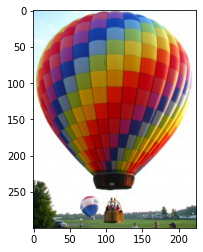

In [ ]:
from skimage import io

image = io.imread('/content/skimage-tutorials/images/balloon.jpg')

print(type(image))
print(image.dtype)
print(image.shape)
print(image.min(), image.max())

plt.imshow(image);

We also have the ability to load multiple images, or multi-layer TIFF images:

In [ ]:
ic = io.ImageCollection('/content/skimage-tutorials/images/*.png:/content/skimage-tutorials/images/*.jpg')

print('Type:', type(ic))

ic.files

#print(ic.files[2])

Type: <class 'skimage.io.collection.ImageCollection'>


['/content/skimage-tutorials/images/Bells-Beach.jpg',
 '/content/skimage-tutorials/images/balloon.jpg',
 '/content/skimage-tutorials/images/bubbles.jpg',
 '/content/skimage-tutorials/images/chapel_floor.png',
 '/content/skimage-tutorials/images/chromosomes.jpg',
 '/content/skimage-tutorials/images/clock_motion.png',
 '/content/skimage-tutorials/images/color-wheel.jpg',
 '/content/skimage-tutorials/images/credit_card.jpg',
 '/content/skimage-tutorials/images/cycle_spin.png',
 '/content/skimage-tutorials/images/fingers.png',
 '/content/skimage-tutorials/images/forest.jpg',
 '/content/skimage-tutorials/images/greenscreen.jpg',
 '/content/skimage-tutorials/images/hand-coin.jpg',
 '/content/skimage-tutorials/images/logo.png',
 '/content/skimage-tutorials/images/microarray.jpg',
 '/content/skimage-tutorials/images/mm.jpg',
 '/content/skimage-tutorials/images/mona_lisa.jpg',
 '/content/skimage-tutorials/images/mpl_hist.png',
 '/content/skimage-tutorials/images/round_pill.jpg',
 '/content/skim

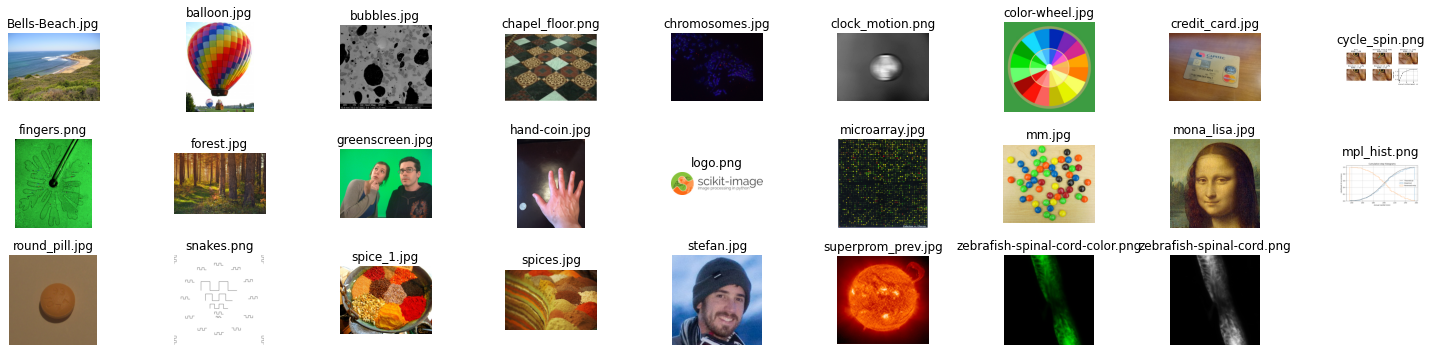

In [ ]:
import os

f, axes = plt.subplots(nrows=3, ncols=len(ic) // 3 + 1, figsize=(20, 5))

# subplots returns the figure and an array of axes
# we use `axes.ravel()` to turn these into a list
axes = axes.ravel()

for ax in axes:
    ax.axis('off')

for i, image in enumerate(ic):
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(os.path.basename(ic.files[i]))
    
plt.tight_layout()

### Aside: `enumerate`

`enumerate` gives us each element in a container, along with its position.

In [ ]:
animals = ['cat', 'dog', 'leopard']

In [ ]:
for i, animal in enumerate(animals):
    print('The animal in position {} is {}'.format(i, animal))

The animal in position 0 is cat
The animal in position 1 is dog
The animal in position 2 is leopard


## <span class="exercize">Exercise: visualizing RGB channels</span>

Display the different color channels of the image along (each as a gray-scale image).  Start with the following template:

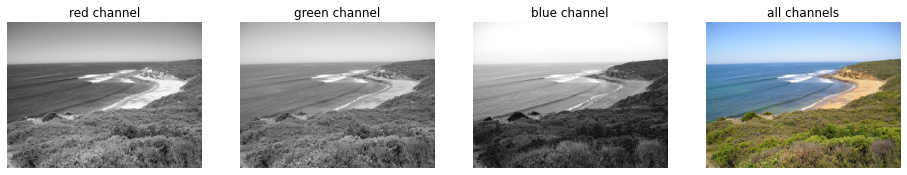

In [ ]:
# --- read in the image ---

image = plt.imread('/content/skimage-tutorials/images/Bells-Beach.jpg')

# --- assign each color channel to a different variable ---

r = image[:,:, 0]
g = image[:,:, 1]
b = image[:,:, 2]

# --- display the image and r, g, b channels ---

f, axes = plt.subplots(1, 4, figsize=(16, 5))

for ax in axes:
    ax.axis('off')

(ax_r, ax_g, ax_b, ax_color) = axes
    
ax_r.imshow(r, cmap='gray') #dropcmap
ax_r.set_title('red channel')

ax_g.imshow(g, cmap='gray')
ax_g.set_title('green channel')

ax_b.imshow(b, cmap='gray')
ax_b.set_title('blue channel')

# --- Here, we stack the R, G, and B layers again
#     to form a color image ---
ax_color.imshow(np.stack([r, g, b], axis=2))
ax_color.set_title('all channels');

## Exercise: Convert to grayscale ("black and white")

The *relative luminance* of an image is the intensity of light coming from each point. Different colors contribute differently to the luminance: it's very hard to have a bright, pure blue, for example. So, starting from an RGB image, the luminance is given by:

$$
Y = 0.2126R + 0.7152G + 0.0722B
$$

Use Python 3.5's matrix multiplication, `@`, to convert an RGB image to a grayscale luminance image according to the formula above.

Compare your results to that obtained with `skimage.color.rgb2gray`.

Change the coefficients to 1/3 (i.e., take the mean of the red, green, and blue channels, to see how that approach compares with `rgb2gray`).

Text(0.5, 1.0, 'my rgb2gray')

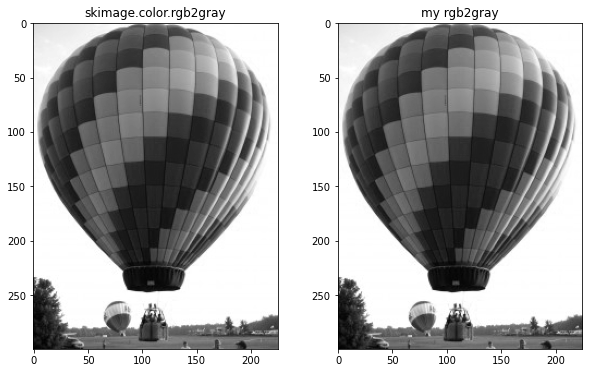

In [ ]:
from skimage import color, img_as_float

image = img_as_float(io.imread('/content/skimage-tutorials/images/balloon.jpg'))

gray = color.rgb2gray(image)
my_gray = image @ [0.2126, 0.7152, 0.0722]
my_gray2 = image[:,:,0] * 0.2126 + image[:,:,1] * 0.7152 + image[:,:,2] * 0.0722

# --- display the results ---

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 6))

ax0.imshow(gray, cmap='gray')
ax0.set_title('skimage.color.rgb2gray')

ax1.imshow(my_gray, cmap='gray')
ax1.set_title('my rgb2gray')

In [ ]:
#Your attandance
#Change text to your name 
#Run this code
#Download the image 
#Upload to attandance form ->>>> https://forms.gle/JP64jpTxBcCVpY8u9

from skimage import color, img_as_float
import cv2
import numpy as np

image = img_as_float(io.imread('/content/wp4588637.jpg'))

texted_image =cv2.putText(img=np.copy(image), text="AMNI", org=(175,400),fontFace=1, fontScale=10, color=(0,0,0), thickness=5)

plt.imshow(texted_image,cmap='gray')

FileNotFoundError: ignored